In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# data
df = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")
print(df)


      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  
0                 0  
1                 0

In [3]:
mutant = df.mutant
DMS = df.DMS_score
DMS_bin=df.DMS_score_bin

In [4]:
# weitere Zeile mit 'position'
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)
print(df)
          

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position  
0                 0        1  
1

In [5]:
#Zeile mit neuer Aminosäure
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position new_aa  
0                 0      

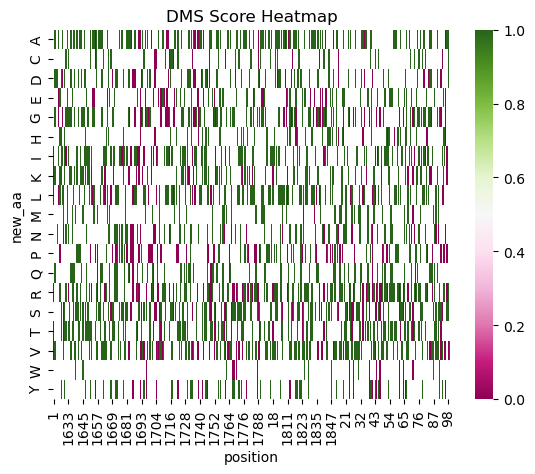

In [46]:
# create a pivot table with 'position' as index, 'new_aa' as columns, and 'dms_score_normalized' as values
pivot_table = df.pivot_table(index='new_aa', columns='position', values='DMS_score_bin', aggfunc='mean')

# plot the heatmap
sns.heatmap(pivot_table, cmap='PiYG')

# add labels and title
plt.xlabel('position')
plt.ylabel('new_aa')
plt.title('DMS Score Heatmap')
plt.show()

In [51]:
# höchster DMS_score, bei dem bin score = 0
bin_filter= df['DMS_score_bin'] == 0
filtered_df = df[bin_filter]

max_DMS = filtered_df['DMS_score'].max()
print(max_DMS)

-1.009539446


In [6]:
df_filtered = df[df['DMS_score_bin'] == 0]

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extract the independent variable (feature)
X = df_filtered[['position']]  # Assuming 'DMS_score' is the independent variable

# Extract the dependent variable (target)
y = df_filtered['DMS_score']  # Assuming 'mutant' is the dependent variable

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable for new data points
# Assuming you have a new dataframe named 'new_df'
X_new = df[['position']]  # Extract the relevant column
y_pred = model.predict(X_new)

# Print the predicted values
print(y_pred)





[-1.98565131 -1.98565131 -1.98565131 ... -1.91717133 -1.91717133
 -1.91717133]


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into input (positions) and output (DMS_score)
X = df_filtered['position'].values.reshape(-1, 1)
y = df_filtered['DMS_score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Predict the DMS_scores for the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)

# Print the model coefficients and score
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("R-squared score:", score)

Intercept: -1.9731456982397582
Coefficient: [3.06161459e-05]
R-squared score: 0.0036057233880457673


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


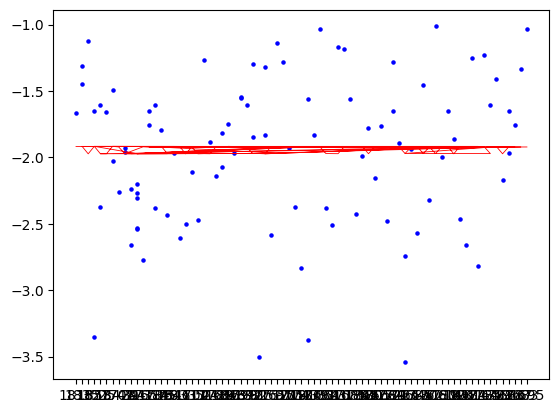

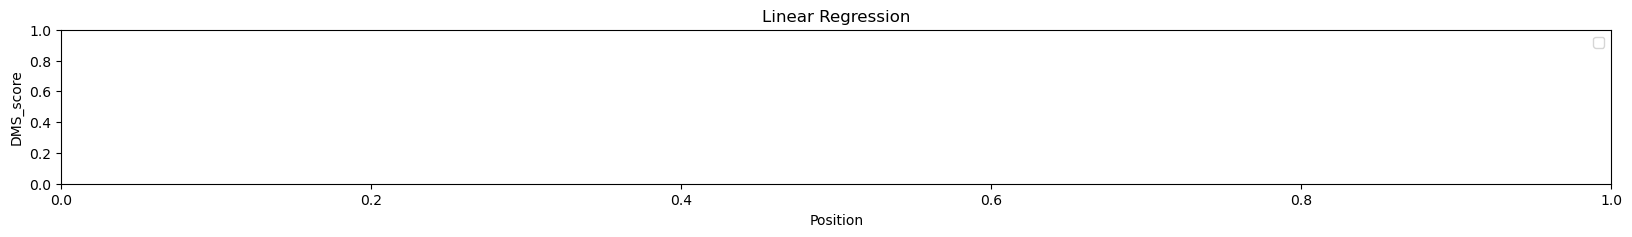

In [54]:
import matplotlib.pyplot as plt

# Extract the column for plotting
X_test_column = X_test[:, 0]

# Plot the actual data points
plt.scatter(X_test_column, y_test, color='blue', label='Actual', s=5)

# Plot the predicted values
plt.plot(X_test_column, y_pred, color='red', linewidth=0.6, label='Predicted')
plt.figure(figsize=(20,2))

# Set labels and title
plt.xlabel('Position')
plt.ylabel('DMS_score')
plt.title('Linear Regression')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into input (positions) and output (DMS_score)
X = df_filtered['position'].values.reshape(-1, 1)
y = df_filtered['DMS_score'].values


# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")




coefficient of determination: 0.0025851035421701196
intercept: -1.9856882459589416


In [21]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Helices

specific_values = ['8', '9', '10',"11","12","13","14","15","16","17","18","19","20","21","22","28","29","30","31","41","42","43","44","45","46","47","48","49","50","51","52","70","71","72","73","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","1659","1660","1661","1662","1663","1664","1665","1666","1667","1668","1669","1670","1671","1701","1702","1703","1704","1705","1706","1707","1708","1716","1717","1718","1719","1720","1721","1722","1723","1724","1725","1749","1750","1751","1752","1753","1754","1755","1777","1778","1779","1780","1781","1782","1783","1784","1785","1786","1820","1821","1822","1823","1824","1825","1826","1827","1835","1836","1837","1838","1839","1840","1841","1842","1843","1844"]

specific_values_df = df.loc[df['position'].isin(specific_values)]
print(specific_values_df)



      mutant                                   mutated_sequence  DMS_score  \
41       V8G  MDLSALRGEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.312289   
42       V8F  MDLSALRFEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.569227   
43       V8D  MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.121676   
44       V8A  MDLSALRAEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.223406   
45       V8I  MDLSALRIEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.560919   
...      ...                                                ...        ...   
1768  L1844H  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.312583   
1769  L1844I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.268220   
1770  L1844F  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.170768   
1771  L1844V  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.196109   
1772  L1844P  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.232682   

      DMS_score_bin position new_aa  
41                1      

In [22]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Helices (bin=0)
helices_df_bin0 = specific_values_df.loc[specific_values_df['DMS_score_bin'] == 0].copy()
helices_df_bin0

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,new_aa
43,V8D,MDLSALRDEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.121676,0,8,D
59,V11L,MDLSALRVEELQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.168017,0,11,L
60,V11G,MDLSALRVEEGQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.474497,0,11,G
61,V11E,MDLSALRVEEEQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.204883,0,11,E
68,Q12P,MDLSALRVEEVPNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.184755,0,12,P
...,...,...,...,...,...,...
1756,V1842G,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.922434,0,1842,G
1759,V1842A,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.494811,0,1842,A
1760,V1842E,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.026893,0,1842,E
1761,A1843E,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.819921,0,1843,E


In [20]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strand

specific_values2 = ["1650","1651","1652","1653","1654","1674","1675","1676","1677","1684","1685","1686","1687","1688","1689","1712","1713","1714","1715","1765","1766","1767","1768","1769","1807","1808","1809","1810"]

specific_values_df2 = df.loc[df['position'].isin(specific_values2)]
print(specific_values_df2)

      mutant                                   mutated_sequence  DMS_score  \
683   M1650R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.292724   
684   M1650L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.117123   
685   M1650K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.081677   
686   M1650I  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.093431   
687   M1650T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.210381   
...      ...                                                ...        ...   
1575  V1810M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.477758   
1576  V1810L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.121348   
1577  V1810G  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -3.373881   
1578  V1810E  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.563641   
1579  V1810A  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.036261   

      DMS_score_bin position new_aa  
683               1     1

In [27]:
# checking secondary structure for DMS_score_bin -> Werte aus Psipred ->  in df nur noch Mutation bei Strands (bin=0)
strand_df_bin0 = specific_values_df2.loc[specific_values_df2['DMS_score_bin'] == 0].copy()
strand_df_bin0

row_count = len(strand_df_bin0)
print("Number of rows:", row_count)

Number of rows: 60


In [ ]:
#mutationssprung von 101 auf 1631

#if its not the same, do that and that (whole sequenz)

In [31]:
#Buchstaben ist secondary structure: wollte jedes in Anführungszeichen
string = "CCCCCCCHHHHHHHHHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHCCCCHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCHHHHHHCHHHHHHHCHHHHHHHHHCCCCCCCCCCCCCCCHHHHCCCCEECCCCCCCCCCCCCEEEEEECCCCCHHHHHHHHCCCCCCCCEEEECCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCCEECCCCCCCCHHHCCCCCCCCCHHHCCCCCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCHHHHHCCCCCCCC"
quoted_string = ''.join(['"' + char + '"' for char in string])

print(quoted_string)


"C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""H""H""H""H""H""H""H""C""H""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""E""E""E""E""C""C""C""C""C""H""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""E""E""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""E""E""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""H""H""H""H""H""H""H""C""C""C""C""C""C""C""C""H""H""H""H""H""H""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""C""